In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

import h5py

plotter = Plotter()

from scipy.optimize import curve_fit

# Critical line

In [175]:
data1 = ConfResults(fn="../data/zcritical_N048_m-0482300_h002000_c00500.h5",thTime=400,dt=0.8, data_format="new")
dt=0.8

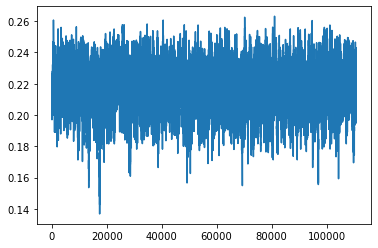

In [8]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
plt.show()

In [215]:
data1.computeFourierPropagator("dsigma",decim=1000, errFunc = lambda x: bootstrap(x,100))

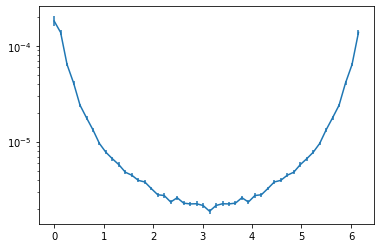

In [177]:
plotter.plot(data1,"propagator", "dsigma")



plt.yscale('log')

In [216]:
data1.computeFourierPropagator("V",decim=1000, errFunc = lambda x: bootstrap(x,100))

(0.0003, 0.0005)

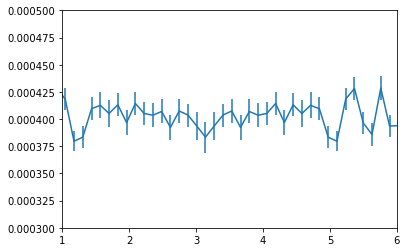

In [179]:
plotter.plot(data1,"propagator", "V")
plt.xlim([1,6])
plt.ylim([3e-4,5e-4])

#plt.yscale('log')

In [140]:
4e-4 * 48**3 / 5.01

8.829700598802397

In [217]:
data1.computeFourierPropagator("phi",decim=1000, errFunc = lambda x: bootstrap(x,100))

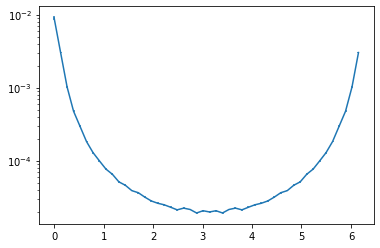

In [181]:
plotter.plot(data1,"propagator", "phi")


plt.yscale('log')

In [218]:
resFit = dict()

In [219]:
fit = lambda x, a , m2 : a / (4.0 * np.sin(x / 2.0)**2 + m2)

In [220]:
kMax = int(len(data1.momenta_3d) )
resFit["phi"] = curve_fit(fit, data1.momenta_3d[:kMax], data1.wallFProp["phi"].mean[:kMax])
resFit["dsigma"] = curve_fit(fit, data1.momenta_3d[:kMax], data1.wallFProp["dsigma"].mean[:kMax])

KeyError: 0

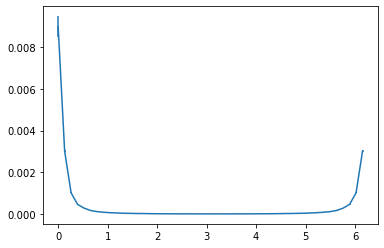

In [185]:
plotter.plot(data1,"propagator", "phi")
plt.plot(data1.momenta_3d[:kMax], fit(data1.momenta_3d[:kMax],resFit[0][0], resFit[0][1]))
plt.yscale('log')
#plt.xlim([0,np.pi])

In [221]:
resFit

{'phi': (array([3.67739844e-06, 9.72153010e-03]),
  array([[1.96252567e-16, 5.83858424e-13],
         [5.83858424e-13, 1.96652363e-09]])),
 'dsigma': (array([2.88733091e-06, 1.16878335e-01]),
  array([[2.07727559e-15, 1.01122316e-10],
         [1.01122316e-10, 5.50420286e-06]]))}

In [16]:
(resFit["dsigma"][0][0]/resFit["phi"][0][0])**0.5

0.885787376113092

In [224]:
3.67739844e-06*64**3

0.96400793665536

In [223]:
resFit

{'phi': (array([3.67739844e-06, 9.72153010e-03]),
  array([[1.96252567e-16, 5.83858424e-13],
         [5.83858424e-13, 1.96652363e-09]])),
 'dsigma': (array([2.88733091e-06, 1.16878335e-01]),
  array([[2.07727559e-15, 1.01122316e-10],
         [1.01122316e-10, 5.50420286e-06]]))}

In [65]:
2.33e-5 * 48**3

2.5767936000000002

In [60]:
data1.loadAv("phi0")

In [91]:
data1.computeVar("phi0", lambda x, func: jackknife(x, nSamples=10, func=func))

In [93]:
data1.variances["phi0"].err

array([5.48579249e-06])

In [81]:
0.04713266167328617 - data1.meanValues["phi0"].mean**2

0.0002008174696589149

In [3]:
data1 = ConfResults(fn="../data/zminus2_N064_m-0501265_h003684_c00500.h5",thTime=400,dt=0.8, data_format="new")
dt=0.8
data1.directions

['X', 'Y', 'Z']

In [212]:
data1.computeFourierPropagator("A",decim=1000, errFunc = lambda x: bootstrap(x,100))

(1.0, 6.0)

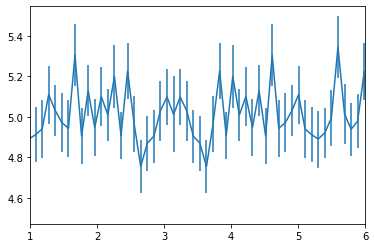

In [214]:
plotter.plot(data1,"propagator", "A", yfact=64**3)
plt.xlim([1,6])
#plt.ylim([40,50])

In [4]:
data1.computeFourierPropagator("dsigma",decim=1000, errFunc = lambda x: bootstrap(x,100))

In [6]:
data1.computeFourierPropagator("phi",decim=1000, errFunc = lambda x: bootstrap(x,100))

In [8]:
resFit = dict()
fit = lambda x, a , m2 : a / (4.0 * np.sin(x / 2.0)**2 + m2)

In [9]:
kMax = int(len(data1.momenta_3d) )
resFit["phi"] = curve_fit(fit, data1.momenta_3d[:kMax], data1.wallFProp["phi"].mean[:kMax])
resFit["dsigma"] = curve_fit(fit, data1.momenta_3d[:kMax], data1.wallFProp["dsigma"].mean[:kMax])

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [10]:
resFit

{'phi': (array([3.66248992e-06, 9.71186810e-03]),
  array([[1.63423527e-16, 4.87636312e-13],
         [4.87636312e-13, 1.64732225e-09]])),
 'dsigma': (array([2.87366019e-06, 1.15772469e-01]),
  array([[2.26923679e-15, 1.09939783e-10],
         [1.09939783e-10, 5.95530668e-06]]))}

In [15]:
np.sqrt(0.365**2 / 5.0 * 0.097**2)

0.01583359734867601

In [34]:
64**3 * resFit["phi"][0][0]

0.9600997565857479

In [32]:
(resFit["dsigma"][0][0]/resFit["phi"][0][0])

0.7846192756813164

# Static coeffs from finite volume

In [2]:
data=dict()
data["24"] = ConfResults(fn="../data/zminus2_N024_m-0501265_h000000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data["32"] = ConfResults(fn="../data/zminus2_N032_m-0501265_h000000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data["48"] = ConfResults(fn="../data/zminus2_N048_m-0501265_h000000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data["64"] = ConfResults(fn="../data/zminus2_N064_m-0501265_h000000_c00500.h5",thTime=400,dt=0.8, data_format="new")


In [30]:
f = "phiH0"

for k in ["24", "32", "48", "64"]:
    data[k].computeMean(f, lambda x, func: blockedBootstrap(x, nSamplesJ=10, nSamplesB=10, func=func))
    data[k].computeVar(f, lambda x, func: blockedBootstrap(x, nSamplesJ=10, nSamplesB=10, func=func))    
    data[k].computeO2(f, lambda x, func: blockedBootstrap(x, nSamplesJ=10, nSamplesB=10, func=func))
    #data[k].computeMean("phi0", lambda x, func: (np.mean(func(x)), 0))
    #data[k].computeVar("phi0", lambda x, func: (np.mean(func(x)), 0))    
    #data[k].computeO2("phi0", lambda x, func: (np.mean(func(x)), 0))

In [40]:
1.2837580661039836-0.0967437327171905**2

1.2743987162839283

In [31]:
testM = []
testE = []

for k in ["24", "32", "48"]:
    print('mean')
    print(data[k].meanValues[f].mean)    
    print(data[k].meanValues[f].err)
    print('var')
    print(data[k].variances[f].mean)    
    print(data[k].variances[f].err)
    print('o2')
    print(data[k].o2[f].mean)    
    print(data[k].o2[f].err)
    testM.append(data[k].variances[f].mean)    
    testE.append(data[k].variances[f].err)

mean
-0.005037953485094846
0.0013715272764099268
var
0.03315958496277893
0.00011799876768280521
o2
0.03316029590317847
7.655756884703212e-05
mean
-0.006085461534010565
0.0021453456923732272
var
0.031055274970948156
0.00031157298281555597
o2
0.0312957853658387
0.0001969027477177844
mean
0.01086671059563957
0.0012997515859427204
var
0.029170301277856588
0.00030220311884142907
o2
0.029275815936699746
0.00021697383580644489


<ErrorbarContainer object of 3 artists>

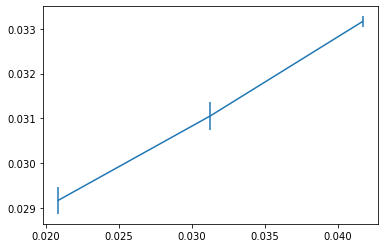

In [33]:
plt.errorbar(1.0/np.asarray([24.0,32.0,48.0]),testM, testE)

In [53]:
def linear(x,a, b):
    return a + a*b*x

def bToF2(b): # b = 2 beta1 /F2
    beta1 = 0.225785
    return 2.0 * beta1 / b

In [54]:
res, cov = curve_fit(linear, 1.0/np.asarray([24.0,32.0,48.0]), testM)
print(res)
print(cov)
print(bToF2(res[1]))

[0.02514446 7.61541926]
[[ 3.87539990e-08 -5.76560228e-05]
 [-5.76560228e-05  8.98076198e-02]]
0.05929680097805829


In [1]:
0.05929680097805829 /5.0

0.011859360195611658

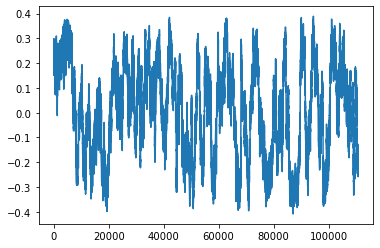

In [134]:
f = "phi0"

k="24"
data[k].loadAv(f)
dt = 0.8
t=np.arange(len(data[k].av[f])) * dt
plt.figure(1)
plt.plot(t[:],data[k].av[f])
plt.show()

In [134]:
plt.savefig('H032.pdf')

<Figure size 432x288 with 0 Axes>

In [135]:
64**3/48**3

2.3703703703703702

In [ ]:
data = ConfResults(fn="../data/zcritical_N080_m-0482300_h002000_c00500.h5",thTime=400,dt=0.8, data_format="new")


In [2]:
0.365**2

0.13322499999999998